# Quantified Self Project
_Author : Carolyn Bozin_  
_Date Updated : 12/21/2022_  
_Course : CPSC222_  
## 1. Introduction  
In this Jupyter Notebook I will be exploring some of my location data through a multipstep process.   
### a. Domain: 
* My "Semantic Location" Data from the Google Takeout service (Google Maps).  
* I am interested in doing research on this data because I want to see if I have had different movement habits (i.e. deviation in distance travelled, amount of time taken, and activity type) based on where I was at different points in my life. In this project I will be focusing on my data from Spring 2022 when studied abroad in Madrid, Spain, and comparing it to my data from Summer 2022 when I got back to Spokane.  

### b. About the Data:

My dataset is in multiple JSON files which are seperated by month. The tables that I am including from the dataset are all from the "Activity Segment" portion of the JSON file, which is just periods when I moved from one location to another. The attributes of my Activity Segments that I am including are as listed in this chart:

1. **Start Timestamp** : Date and time when I started the activity segment 
1. **End Timestamp** : date and time when I ended the activity segment 
1. **Start Latitude** : Latitude of starting location
1. **Start Longitude** : Longitude of starting location
1. **End Latitude** : Latitude of ending location
1. **End Longitude** : Longitude of ending location
1. **Distance** : distance travelled in meters
1. **Activity** : my method of travel. Activities that are represented in my data are walking, riding the subway, riding the bus, riding in a passenger vehicle (car), riding on a plane, riding a ferry, and riding a train

>Note: This data was all collected by Google Maps through either cell service or GPS. 
>Time Zone and formatting was accounted for.
  
The data that I decided to pull from the dataset are from the time that I was studying abroad, which is roughly from Jan 21 2022 to May 5 2022, and additionally from last Summer when I was in Spokane, which is roughly from May 22 2022 to August 14 2022. This turns out to be about 642 instances for my study abroad data and about 363 instances for my Spokane data. 



### c. Hypotheses  

* my average distance travelled in Spain was larger than in Spokane, but not by a lot. My reasoning is that although I did not have a car to travel large distances, I travelled by train and plane there occasionally. 

My next few hypotheses are only regarding the Spain sample. 
* I am going to use the MeteoStat weather API to test my hypothesis that I did not travel significantly less distance when the average temperature was lower. My reasoning is that I had to go to school most days no matter the weather, and also I tried to get the most out of my time there even if it was cold. It also did not get super cold except for when I first arrived there.  

*  mean distance travelled over weekends will be larger than on weekdays, since I had more free time and did not have school. As a side note, I am including Fridays in my weekends because I did not have classes. I am going to use the kNN algroithm and a Decision Tree to classify data on "weekend" vs "weekday" labels. 

### d. Potential Impacts & Stakeholders  
Mostly these results are to sate my own curiosity. However, a potential impact could be an improved self awareness of my travel methods. In particular, maybe seeing how much I walked in Spain will motivate me to walk more back in Spokane. Potential stakeholders are me and anyone curious about studying abroad in Madrid perhaps.


## 2. Exploratory Data Analysis (EDA)   
Now that I have explained the data a little bit, we can continue to the EDA. This section will consist of loading the data, cleaning the data, making vizualizations, and finallly doing hypothesis tests.
### a. Data Loading  
The first step is to load the data from JSON format into one big dataframe that contains all the dates I need. Overall I need data from January, February, March, April, May, June, July, and August of 2022. I will split the data up later.

>Note : I used [`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to combine the different months. 

In [86]:
import pandas as pd
import utils 
import importlib
import matplotlib.pyplot as plt

importlib.reload(utils) # to reload utils every time

jan_aug_df = utils.load_data()
jan_aug_df

,timelineObjects
0,{'placeVisit': {'location': {'latitudeE7': 477...
1,{'activitySegment': {'startLocation': {'latitu...
2,{'placeVisit': {'location': {'latitudeE7': 477...
3,{'activitySegment': {'startLocation': {'latitu...
4,{'placeVisit': {'location': {'latitudeE7': 478...
...,...
242,{'activitySegment': {'startLocation': {'latitu...
243,{'placeVisit': {'location': {'latitudeE7': 476...
244,{'placeVisit': {'location': {'latitudeE7': 476...
245,{'activitySegment': {'startLocation': {'latitu...


The data from the months I need is now in a dataframe title "timeline Objects". Granted, it still contains information I do not want (such as place visit data) and it is not organized into two dataframes like I want it to be. The next step is to take care of both these things.

* Split Into Two Dataframes  
    * In this section, I will split the Google Maps dataframe of JSON data into two dataframes (one for Madrid, one for Spokane) based on the Start Timestamps of each activity segment. I will also convert the Timestamps to Python Datetime objects, which will make them slightly more human readable and a lot easier to work with. 


* The next step will be to parse through the dataframe, go into each activity segment while ignoring the place visits, and grab all of the data for each activity segment that has a Start Timestamp within the range of dates I want. To get the index of the data I need, I will print out activity segments from the first and last day of my range. I will then pick the first and last indeces printed as my indeces to split the dataframe on.

* For my study abroad data, I will pass in the dates 2022-01-21 and 2022-05-05 to my utility function, which will print the indeces I want.

In [87]:
start_end_vals = utils.get_start_end(jan_aug_df, "2022-01-21", "2022-05-05")
print(start_end_vals[0], start_end_vals[-1])

118 1333


The first instance from the start date is 118, and the last instance from the end date is 1333. Using these two values to divide the dataframe I can parse through the JSON data in jan_to_aug.csv and make a new dataframe of the data from my time in Madrid.

In [88]:
start = 118
end = 1333

study_abroad_df = utils.make_dataframe(jan_aug_df, start, end)
study_abroad_df.sample()

,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
589,2022-04-27T11:04:07.238Z,2022-04-27T11:32:02.408Z,404147188,-36925347,404122721,-37043427,1400,WALKING


This looks much cleaner than the JSON data! Now that we have a dataframe for my study abroad time, the next step is to make one for my time in Spokane last Summer. This will include all instances from the dates 2022-05-22 to 2022-08-22.

In [89]:
utils.get_start_end(jan_aug_df, "2022-05-22", "2022-08-14")

[1491, 1493, 2210, 2212, 2214, 2216]

The first instance from the start date is 1491, and the last index from the end date is 2216. Now we can make a dataframe for my data from Spokane in the Summer of 2022. 

In [90]:
start = 1491
end = 2216

summer_df = utils.make_dataframe(jan_aug_df, start, end)
summer_df.sample()

,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
246,2022-07-19T15:47:51.903Z,2022-07-19T15:55:50.970Z,476748733,-1173911247,476678280,-1174012022,1611,IN_PASSENGER_VEHICLE


#### b. Data Cleaning 
* Check For Missing Values  
    * I did not see any missing data while parsing through the dataframes visually, but just in case I will check with Python using the `df.isna()` function along with `.value_counts()`.

In [91]:
print(study_abroad_df.isna().value_counts())
print(summer_df.isna().value_counts())

Start Timestamp  End Timestamp  Start Latitude  Start Longitude  End Latitude  End Longitude  Distance (m)  Activity
False            False          False           False            False         False          False         False       642
Name: count, dtype: int64
Start Timestamp  End Timestamp  Start Latitude  Start Longitude  End Latitude  End Longitude  Distance (m)  Activity
False            False          False           False            False         False          False         False       363
Name: count, dtype: int64


Just as I suspected, all the columns are 'False' meaning there are no missing values.

* Convert Timestamps to DateTime 
    * The next step is to take the Start and End Timestamps and convert them to pandas `dateTime` objects so that they are easier to work with later on.

In [92]:
start_fixed = pd.to_datetime(summer_df["Start Timestamp"], format='ISO8601')
end_fixed = pd.to_datetime(summer_df["End Timestamp"], format='ISO8601')

summer_df["Start Timestamp"] = start_fixed
summer_df["End Timestamp"] = end_fixed

summer_df.sample()

,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
270,2022-07-24 19:05:37+00:00,2022-07-24 19:18:10.991000+00:00,476376887,-1223511363,476555447,-1223807076,3898,IN_PASSENGER_VEHICLE


That still looks a bit cluttered, but at the very least it is in a better format and timezones have been adjusted for. Next we have to do the same for the study abroad data.

In [93]:
start_fixed = pd.to_datetime(study_abroad_df["Start Timestamp"], format='ISO8601')
end_fixed = pd.to_datetime(study_abroad_df["End Timestamp"], format='ISO8601')

study_abroad_df["Start Timestamp"] = start_fixed
study_abroad_df["End Timestamp"] = end_fixed

* Add Date Column  
    * Since I am going to do some analysis on daily activity later on, it will be useful to add a seperate column with just the dates extracted from the timestamps. We can do this by using [strftime()](https://www.programiz.com/python-programming/datetime/strftime) (a function to convert datetime objects to strings) in a utility function.

In [94]:
date_lst = utils.make_date_col(study_abroad_df)
# add col to study abroad df
study_abroad_df.insert(column="Date", value=date_lst, loc=0)
study_abroad_df.sample()

,Date,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
319,2022-03-10,2022-03-10 12:19:19.274000+00:00,2022-03-10 12:20:32.600000+00:00,404081935,-37037188,404074418,-37039731,92,WALKING


In [95]:
date_lst = utils.make_date_col(summer_df)
# add col to summer df
summer_df.insert(column="Date", value=date_lst, loc=0)


* Fix Latitude and Longitude Columns   
    * The latitude and longitude is not displayed badly, but adding a decimal point would make it more understandable to the viewer. Using my knowledge of the latitude and longitude of both Madrid and Spain, I will insert a decimal point into each of these values.

In [96]:
#madrid
utils.fix_lat_lon_all(study_abroad_df)
study_abroad_df.sample()

,Date,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
459,2022-03-31,2022-03-31 14:43:27.566000+00:00,2022-03-31 14:55:41.756000+00:00,40.4050982,-3.7022846,40.4293302,-3.7013957,2829,IN_SUBWAY


In [97]:
#spokane
utils.fix_lat_lon_all(summer_df)


* Make Activity Column Numeric  
    * The last step in cleaning this data will be to encode the Activity column into numeric data using the `sklearn.preprocessing.LabelEncoder()`. This will help down the road when I will be doing hypothesis testing on my Activity data. I will still keep the original categorical Activity data just so it is more user friendly. So that the encoding is consistent across both dataframes, I will first concatenate them and make one large dataframe. Then after wncoding I will seperate them once again.

In [98]:
combined_df = pd.concat([study_abroad_df, summer_df])

num_act = utils.encode_column(combined_df, "Activity")
# replace old col in combined df
combined_df["Activity"] = num_act
combined_df.sample()

,Date,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity
250,2022-03-02,2022-03-02 08:18:58.877000+00:00,2022-03-02 08:26:04.015000+00:00,40.4081987,-3.7046992,40.4119964,-3.7053131,443,7


Looks like the Activity column was encoded properly! Here is a key to the encoded data:
> Flying = 0, In Bus = 1, In Ferry = 2, In Passenger Vehicle = 3, In Subway = 4, In Train = 5, Unknown = 6, Walking = 7  

Now we can split this dataframe in two once again.

In [99]:
study_abroad_lst, summer_lst = utils.split_col(combined_df, "Activity", 642)

#insert cols into both dfs 
study_abroad_df.insert(loc=9, value=study_abroad_lst, column="Activity Code")
summer_df.insert(loc=9, value=summer_lst, column="Activity Code")

In [100]:
summer_df.sample()

,Date,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity,Activity Code
33,2022-06-01,2022-06-01 20:37:58.246000+00:00,2022-06-01 21:22:16.114000+00:00,47.8566439,-1.172768482,47.6747079,-1.173907583,25917,IN_PASSENGER_VEHICLE,3


The activity code column has been properly inserted.

* Add Day of Week Col

In [101]:
days = pd.read_csv("days_week.csv")
study_abroad_df.insert(value=days["Day"], column="Day of Week", loc=1)
study_abroad_df.sample()

,Date,Day of Week,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity,Activity Code
396,2022-03-22,Tuesday,2022-03-22 13:41:30.157000+00:00,2022-03-22 13:53:41.162000+00:00,40.4434170,-3.6179347,40.4375669,-3.6199636,841,WALKING,7


### c. Join on Daily Weather Data
* Now that the dataset has been cleaned, I can continue to the next step, which is joining my study abroad dataframe with weather data using the Meteostat API. I am only joining with the study abroad data in this case because my hypotheses involving weather only apply to this dataset and not the one from Spokane. 

> Note: This step was a bit of a pain for me. At first I tried to use each instance in the the "Start Latitude" and "Start Longitude" columns to generate a list of weather station IDs that were gathered using the Find Station functionality of the Meteostat API. This gave me a lot of trouble because I realized that the Lat/Long columns were not formatted correctly (they did mnot have decimals). Because of this I went back to the cleaning stage and inserted a section where I added decimal points to all of the Lat/Long data. This ended up generating results, but there were still some Lat/Long values that did not generate a station ID and this was breaking my code. Evenually I figured out how to get np.NaN values inserted in these cases. Finally, the code was not crashing, and I got it to run ok. However, the code was taking a _lot_ of time to run, and also used up all of the requests available to me at for free. Thus, I had to rethink how I was going to do this. 

* Instead of getting a seperate station ID for every instance of my dataframe, I googled the latitude and longitude of Madrid and used the MeteoStat API user interface (limiting the number of stations to 1) to get one station for all of my data. This is not the most accurate way to represent weather data during my time abroad, because I did not spend all of my time in Madrid. However, it was better than getting individual stations for all of my instances. 

* After getting the ID of the weather station, I used several utility functions in a python file called `weather_data.py` in order to request daily weather data from the API. I then sent the daily weather data to a csv file called `daily_weather_madrid.csv`. This is convenient because it keeps my API key outside of this project and also makes it so that every time I run this file I don't have to request the same data again. 

* Grabbing the data will be easy, I can just read from a csv file into a new dataframe.

In [102]:
weather_df = pd.read_csv("daily_weather_madrid.csv")
weather_df.sample()

,Unnamed: 0,Date,Avg Temp,Min Temp,Max Temp,Precip.,Snow,Wind Dir.,Wind Speed,Peak Wind Gust,Pressure,Total Sun
81,81,2022-04-12,52.5,47.3,60.3,0.161,NaN,225.0,6.5,NaN,1009.3,NaN


* Now that I have succesfully gotten the data into a dataframe, it would be good to drop the columns that are full of missing values (Snow, Peak Wind Gust, and Total Sun). I will use a threshold of 50, meaning that columns with over 50 missing instances will be dropped. I will also drop the "Unnamed :0" column as it seems to just be an index column.

In [103]:
weather_df.dropna(axis=1, inplace=True, thresh=50)
weather_df.drop("Unnamed: 0", axis=1, inplace=True)
weather_df.sample()

,Date,Avg Temp,Min Temp,Max Temp,Precip.,Wind Dir.,Wind Speed,Pressure
35,2022-02-25,48.0,43.9,51.8,0.154,44.0,10.3,1024.7


* That is looking a lot better. Now we can go ahead and do an inner join on this dataframe with the study abroad location dataframe. 

In [104]:
merged_df = study_abroad_df.merge(weather_df, how='inner', on="Date")
merged_df.sample()

,Date,Day of Week,Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity,Activity Code,Avg Temp,Min Temp,Max Temp,Precip.,Wind Dir.,Wind Speed,Pressure
137,2022-02-12,Saturday,2022-02-12 10:34:43.019000+00:00,2022-02-12 11:12:29.997000+00:00,40.4951528,-3.7257016,40.4938047,-3.7319258,930,WALKING,7,50.9,44.4,58.6,0.0,92.0,4.3,1024.0


### e. Aggregates & Data Visualizations  
The next step in our Exploratory Data Analysis is to perform various aggregate functions on the data, which will give hints as to if my hypotheses were correct or not.

**Total Time per Activity Segment (Madrid vs Spokane)**
* To test whether total time taken on activity segments per day was was greater in Madrid than it was for Spokane, I will first make a column of total elapsed time in minutes for each activity segment.

In [105]:
dif_ser_min = utils.get_time_elapsed(study_abroad_df)

# add col to study abroad df
study_abroad_df.insert(column="Time Elapsed (min)", value=dif_ser_min, loc=2)
study_abroad_df.sample()

,Date,Day of Week,Time Elapsed (min),Start Timestamp,End Timestamp,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity,Activity Code
341,2022-03-12,Saturday,29.075167,2022-03-12 11:22:51.727000+00:00,2022-03-12 11:51:56.237000+00:00,41.6704788,-8.620058,41.6599572,-8.726851,2110,WALKING,7


In [106]:
dif_ser_min = utils.get_time_elapsed(summer_df)
# add col
summer_df.insert(column="Time Elapsed (min)", value=dif_ser_min, loc=2)

* Now that the elapsed time per activity segment has been inserted, lets get a visualization of the data. .

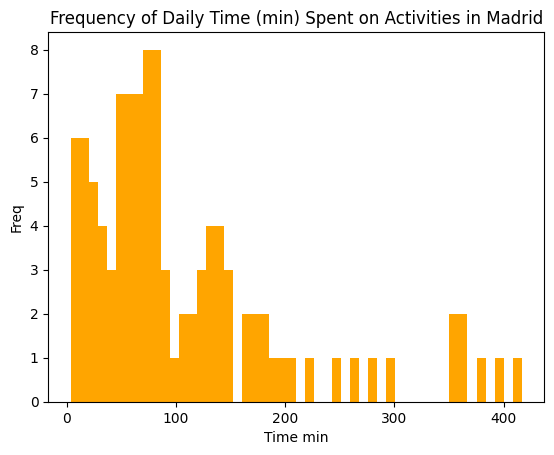

In [107]:
grouped_by_date = study_abroad_df.groupby("Date")

time_per_day_madrid = grouped_by_date["Time Elapsed (min)"].sum()
plt.figure()
plt.title("Frequency of Daily Time (min) Spent on Activities in Madrid")
plt.xlabel("Time min")
plt.ylabel("Freq")
plt.hist(time_per_day_madrid, bins=50, color="orange")
plt.show()

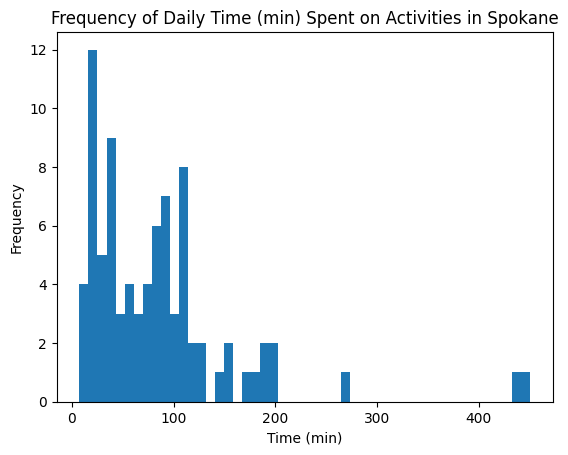

In [108]:
grouped_by_date = summer_df.groupby("Date")
time_per_day_spokane = grouped_by_date["Time Elapsed (min)"].sum()

plt.figure()
plt.title("Frequency of Daily Time (min) Spent on Activities in Spokane")
plt.ylabel("Frequency")
plt.xlabel("Time (min)")
plt.hist(time_per_day_spokane, bins=50)
plt.show()

The time data both seems to be distributed similarly (skewed right), although the max for Spokane is actually higher (around 12 minutes) than for Madrid (around 8 minutes). My hypothesis in this case is probably wrong, so I will instead hypothesize that the Daily Time Spent on activity segments (on average) was higher in Spokane than in Madrid.

**Average Temp vs Daily Activity Time (Madrid)** 
* Next I will plot average temperature vs daily time spent on activities in Madrid.

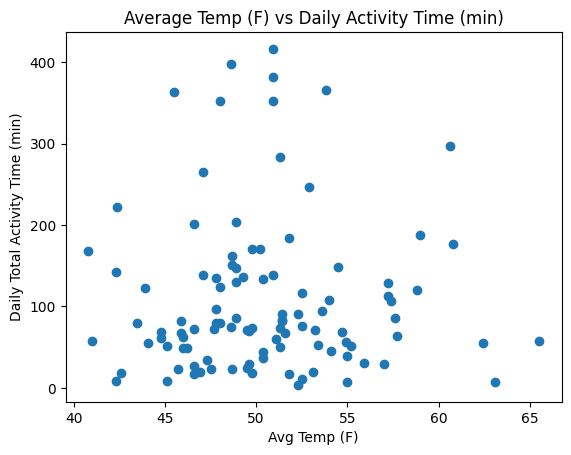

In [109]:
activity_time_by_date = study_abroad_df.groupby("Date")["Time Elapsed (min)"].sum()
avg_temp_by_date = merged_df.groupby("Date")["Avg Temp"].mean()

utils.scatter_plot(avg_temp_by_date, activity_time_by_date, 'Average Temp (F) vs Daily Activity Time (min)', 'Avg Temp (F)', 'Daily Total Activity Time (min)')

This chart seems to back up my hypothesis that average temperature did not really affect time I spent on activities, since I know that I tried to go out and do things no matter the weather. Additionally, the weather was pretty moderate when I was there (as seen in the weather chart, it ranged from the 40s to the 60s)


**Distance Travelled k(m) Weekend vs Weekday**  
* Lastly, I will be plotting distance travelled on weekends vs weekdays. My hypothesis is that average distance is higher on weekends. First, I need to make a column that labels each instance based on if it falls on a weekend or weekday.

In [110]:
weekend_lst = utils.make_weekend_col(study_abroad_df)
study_abroad_df.insert(value=weekend_lst, column="Weekend", loc=2)
grouped_by_weekend = study_abroad_df.groupby("Weekend")
weekend_distance = grouped_by_weekend.get_group(True)["Distance (m)"]/1000
weekday_distance = grouped_by_weekend.get_group(False)["Distance (m)"]/1000

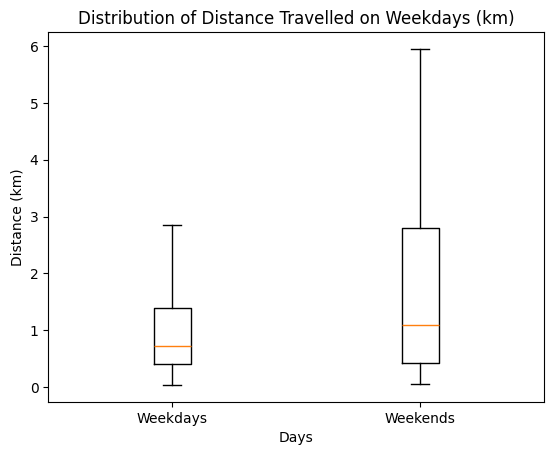

In [111]:
plt.figure()

plt.title("Distribution of Distance Travelled on Weekdays (km)")
plt.ylabel("Distance (km)")
plt.xlabel("Days")
labels = ["Weekdays", "Weekends"]
plt.boxplot([weekday_distance, weekend_distance], showfliers=False)
xticks = [1, 2]
plt.xticks(xticks, labels)
plt.show()

Like I hypothesized, mean distance on weekends turned out to be greater than on weekdays. The boxplots are not super visible, buut the main thing I was interested in seeing was the outliers. There clearly are outliers in the weekend data that skew the mean a lot. This is likely from plane and train rides.

### F. Hypothesis Testing  
#### Test 1: Two Sample One Tailed Independent T Test of Mean Distance of Activity Segments Weekend vs Weekday (Madrid)  
* using my Google Maps dataset, I am going to see if the mean distance of my activity segments in Madrid was greater on Weekends than on Weekdays,.
* my significance level $\alpha$ will be 0.05.

* Here are the formulas I will be using (independent, one tailed):
###### $$t = \frac{\overline{X}_{1} - \overline{X}_{2}}{\sqrt{S_{p}{2}(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$$

###### $$S_{p}^{2} = \frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2}}{n_{1} + n_{2} - 2}$$  
df = n1 + n2 - 2  
* Lets find the degrees of freedom.

In [112]:
# n for both samples:
wd_n = weekday_distance.size
print(wd_n)

we_n = weekend_distance.size
print(wd_n)
df = wd_n+ we_n - 2
print("Degrees of freedom is", df)

365
365
Degrees of freedom is 640


**Step 1: Identify $H_{0}$ and $H_1$**  
* $H_{0}$ : $\mu_{Weekend} \leq \mu_{Weekday}$   
* $H_1$  : $\mu_{Weekend} > \mu_{Weekday}$

**Step 2: Select Level of Significance**  
* $\alpha$ = 0.05, meaning there is a 5% chance of making an error when rejecting the null hypothesis

In [113]:
alpha = 0.05

**Step 3: Select appropriate test statistic**  
* for a one tailed, two sample independent t-test with $\alpha$ value 0.05 and df = 640,
using a t-chart, t is about 1.6477.

In [114]:
t_crit = 1.6477

**Step 4: formulate the _decision rule_**

* If $t_{computed} \leq$ 1.6477, do not reject $H_{0}$-->The population mean distance of activity segments in Spain on weekends is less than or equal to the mean distance of activity segments on weekdays.  
* If $t_{computed} >$ 1.6477, reject $H_{0}$-->The population mean distance of activity segments in Spain on weekends is greater than the mean distance of activity segments on weekdays.

**Step 5: Make a Decision**  
* find $t_{computed}$

* apply decision rule

In [115]:
from scipy import stats

# get t and pvalue
t_comp, p_val = stats.ttest_ind(weekend_distance, weekday_distance)
p_val/=2
print("T is", f"{t_comp:.4f}", ", and p-value is", f"{p_val:.4f}")

# apply decision rule by testing pvalue
if(p_val < alpha):
     print("Reject H0. The population mean distance of activity segments in Spain on weekends is greater than the mean distance of activity segments on weekdays.")
else:
    print("Do not reject H0. The population mean distance of activity segments in Spain on weekends is less than or equal to the mean distance of activity segments on weekdays.  ")

T is 3.5671 , and p-value is 0.0002
Reject H0. The population mean distance of activity segments in Spain on weekends is greater than the mean distance of activity segments on weekdays.


It looks like I was right and the null hypothesis was rejected. I think the main reason is that I was much more likely to travel via train or plane during weekends than on weekdays. For future research it may be good to just test mean distance spent on walking and see if there is a significant difference there.

#### Test 2: Two Sample One-tailed Independent T Test of Daily Time Spent on Activities (Madrid vs Spokane)
* Next I will be testing the mean total daily time spent on activities segments in Madrid vs Spokane. Specifically I am trying to find if mean daily time spent on activities is higher in Spokane than it is in Madrid. I changed my hypothesis from what it was originally because when I graphed the data it seemed like Spokane had higher average total time.

* Here are the formulas I will be using (independent, one tailed):
###### $$t = \frac{\overline{X}_{1} - \overline{X}_{2}}{\sqrt{S_{p}{2}(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$$

###### $$S_{p}^{2} = \frac{(n_{1} - 1)s_{1}^{2} + (n_{2} - 1)s_{2}^{2}}{n_{1} + n_{2} - 2}$$  
df = n1 + n2 - 2  
* Lets find the degrees of freedom.

In [116]:
m_n = time_per_day_madrid.size
s_n =  time_per_day_spokane.size 

df = m_n + s_n - 2

print("Degrees of freedom is", df)

Degrees of freedom is 186


**Step 1: Identify $H_{0}$ and $H_1$**  
* $H_{0}$ : $\mu_{TimeOnActivitiesSpokane} \leq \mu_{TimeOnActivitiesMadrid}$   
* $H_1$  : $\mu_{TimeOnActivtiesSpokane} > \mu_{TimeOnActivitiesMadrid}$

**Step 2: Select Level of Significance**  
* $\alpha$ = 0.05, meaning there is a 5% chance of making an error when rejecting the null hypothesis

In [117]:
alpha = 0.05

**Step 3: Select appropriate test statistic**  
* for a one tailed, two sample independent t-test with $\alpha$ value 0.05 and df = 186,
using a t-chart, t is about 1.6536.

**Step 4: formulate the _decision rule_**

* If $t_{computed} \leq$ 1.6536, do not reject $H_{0}$-->The population mean daily time spent on activities in Spokane is less than or equal to the population mean daily time spent on activities in Madrid.  
* If $t_{computed} >$ 1.6536, reject $H_{0}$-->The population mean daily time spent on activities in Spokane is greater than the population mean daily time spent on activities in Madrid.

**Step 5: Make a Decision**  
* find $t_{computed}$
* apply decision rule

In [118]:
# get t and pvalue
t_comp, p_val = stats.ttest_ind(time_per_day_madrid, time_per_day_spokane)
p_val/=2
print("T is", f"{t_comp:.4f}", ", and p-value is", f"{p_val:.4f}")

# apply decision rule by testing pvalue
if(p_val < alpha):
     print("Reject H0. The population mean daily time spent on activities in Spokane is greater than the population mean daily time spent on activities in Madrid.")
else:
    print("Do not reject H0. The population mean daily time spent on activities in Spokane is less than or equal to the population mean daily time spent on activities in Madrid.")

T is 1.7707 , and p-value is 0.0391
Reject H0. The population mean daily time spent on activities in Spokane is greater than the population mean daily time spent on activities in Madrid.


My hypothesis in this case was also correct, although the p-value pf 3.91% is fairly close to my alpha level 5%. At the significance level of 0.05 average daily time spent on activities was higher in Spokane than in Madrid. I suppose this makes sense because most of my activities in Madrid involved walking short distances, while in Spokane the distances are larger and take more time even though I have a car.

## 3. Machine Learning  
* In this section I will classify the data using the kNN algorithm and a Decision Tree Classifier. In particular, I want to classify my study abroad data based on whether the activity segment falls on a weekday or a weekend. 

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [120]:
print(study_abroad_df["Weekend"].value_counts())

Weekend
False    365
True     277
Name: count, dtype: int64


* As seen above, there are 365 instances of Weekdays and 277 instances of Weekend days. This is not super equal but also not bad. My guess is that the classifiers will not do very well, but that the distance travelled will be one of the most significant features in determining weekends/weekdays. I will evaluate both classifiers using `sklearn.metrics.accuracy_score`.  

* First, lets make our X and y. y will contain the "Weekend Column", and X will contain only informative numeric data.

In [121]:
X = study_abroad_df.drop("Weekend", axis=1)
y = study_abroad_df["Weekend"]

* Lets take away uninformative columns and columns that would help my classifier cheat. Uninformative columns include Activity, which is categorical. Columns that would help the classifier cheat include date, start/end timestamps, and day of week.  

In [122]:
X.drop("Date", axis=1, inplace=True)
X.drop("Start Timestamp", axis=1, inplace=True)
X.drop("End Timestamp", axis=1, inplace=True)
X.drop("Day of Week", axis=1, inplace=True)
X.drop("Activity", axis=1, inplace=True)

X.sample()

,Time Elapsed (min),Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (m),Activity Code
91,14.149283,40.4084030,-3.6995857,40.4055744,-3.7070124,1321,7


* Next, lets divide the data into traninng and testing sets using the hold out method. I will hold out the default amount, which is 25%.

In [123]:
#divide into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, stratify=y)

* Now we can normalize the data, which will make it all on the same scale.

In [124]:
# normalize data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

* Now we can fit the data using a kNN classifier. After some experimentation I found that 2 neighbors produces the best results.

In [125]:
utils.kNN(X_train,y_train, X_test, y_test)

accuracy : 0.6211180124223602


* The accuracy (62.11%) is not amazing, like I predicted. Lets use a Decision Tree Classifier now and see if that is better. I will print the Decision tree (with a max depth of 3) in order to see which traits may inform the classifier the most.

accuracy : 0.6086956521739131


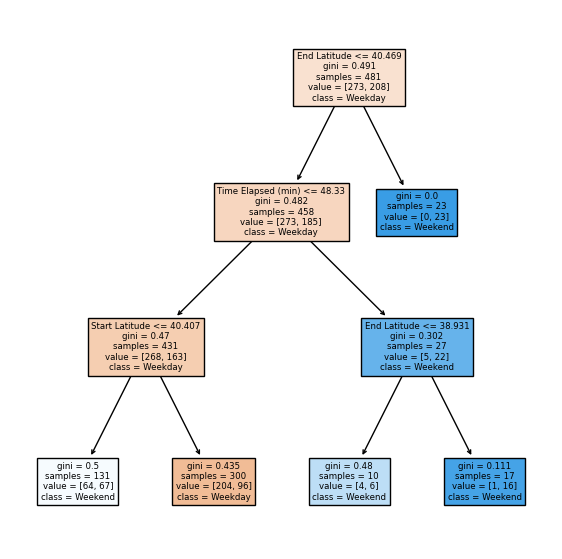

In [126]:
utils.decision_tree(X, X_train, y_train, X_test, y_test)

The accuracy of the decision tree (60.87%) is actually very close to the accuracy of the kNN classifier, which I did not expect. The attributes that most informed the classifer seem to be Time Elapsed, Start and End Latitude. I think that I was on the right track in thinking distance would be very significant, although instead of distance it was actually time elapsed. My theory as to why latitude and longitude were significant features is that on weekdays my start/end latitudes tended to be home and school, whereas on weekends I travelled to other areas. 

### 4. Conclusion  
* My Google Maps data was a pain to clean and analyze, but I think it gave me some interesting and valuable insights.
* The classification on Weekend/Weekday was more accurate then I expected, and I am curious to see if I could remove or add features to make it more accurate 
    * possibly removing activity code, longitude values since they didnt seem as relevant
    * adding features like rate of travel, as well as a label for where I was leaving from and where I was going, could help
* Avg distance of activity segments in Spokane was larger than in Madrid, going against my prediction
* Distance travelled on weekends in Madrid was larger than weekdays, like I predicted
* Weather did not impact my time of activity segments in Madrid, like predicted


#### Potential Impacts  
* I think that the biggest ethical dilemma with this dataset is likely the fact that I am being tracked so closely wherever I go. It was kind of scary to see how accurate this data was, down to the exact latitude and longitude of my locations. As for my own work, I think that it could potentially be used by students looking to study abroad in Spain or just people wondering about the differences in transport between America and Europe generally. 